In [ ]:
library(ggplot2)
library(tidyverse)
library(data.table)

: 

In [5]:
options(repr.plot.width = 2, repr.plot.height = 2, repr.plot.res = 200)
theme_set(theme_bw())
theme_update(
    panel.background=element_blank(),
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(),
    )

# Binomial

In [2]:
dbinom(x = 3, size = 20, prob = 0.5)

[1] 0.1171875

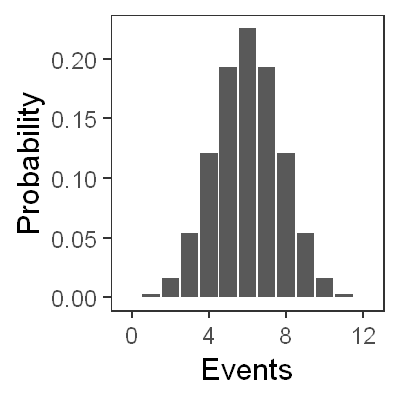

In [7]:
df = tibble(Probability=dbinom(x = 0:12, size = 12, prob = 0.5), Events=0:12)

ggplot(data=df, aes(x = Events, y = Probability)) +
geom_bar(stat = "identity")

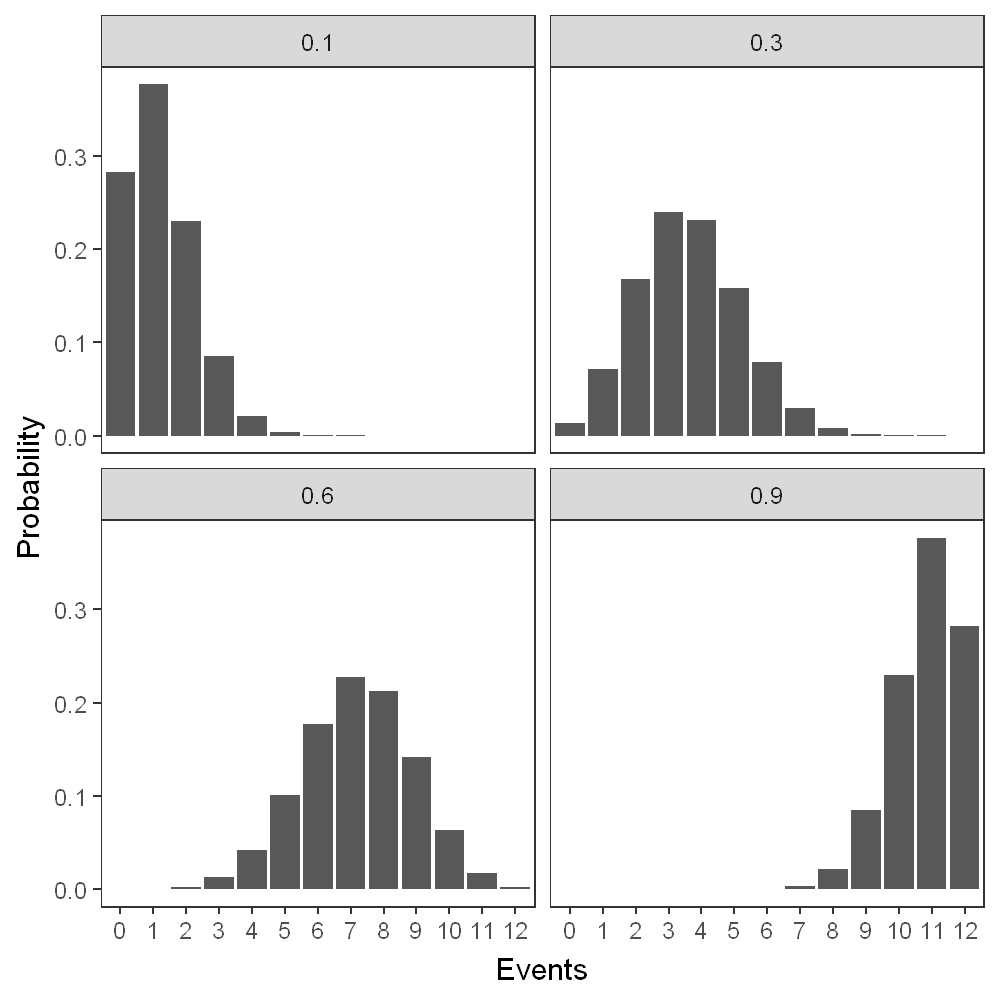

In [9]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 200)

events = 0:12
probs_binom = c(0.1, 0.3, 0.6, 0.9)

probs <- sapply(probs_binom, function(y) sapply(events, dbinom, prob=y, size=12, simplify = TRUE))
colnames(probs) <- probs_binom
rownames(probs) <- events

probs <- probs %>% as_tibble(rownames = "Events")
df <- melt(probs, id.vars = "Events",variable.name = "Prob_Success", value.name = "Probability")
df$Events <- factor(df$Events, levels=events)

ggplot(data=df, aes(x = Events, y = Probability)) +
geom_bar(stat = "identity") +
  facet_wrap(vars(Prob_Success))